## Part 1: Building a K-means Clustering Model

Customer segmentation refers to the process of separating customers into groups that reflect similar characteristics of customers within the group. In this coding example, we will be performing an unsupervised K-means clustering of data on the customer records from a grocery firm's database.

### Dataset and Preprocessing

The dataset contains 2240 customer data samples, each with 29 attributes covering customer personal information (such as income, education, year of birth), customer purchase information (such as amount spent on different types of products) and customer activity information (such as number of web visits per month). For visualizations purposes, in this demo we will select only three attributes out of the 29 provided for clustering. You are encouraged to look through the full dataset and descriptions: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

df = pd.read_csv('./marketing_campaign.csv', sep="\t")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In this demo, let's focus on customer activity and perform clustering based on the number of web, catalog, and store purchases. The goal here would be to obtain clusters of customers that indicate certain purchasing behaviors.

In [ ]:
df_purchase = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
df_purchase.head()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,8,10,4
1,1,1,2
2,8,2,10
3,2,0,4
4,5,3,6


In [ ]:
df_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   NumWebPurchases      2240 non-null   int64
 1   NumCatalogPurchases  2240 non-null   int64
 2   NumStorePurchases    2240 non-null   int64
dtypes: int64(3)
memory usage: 52.6 KB


In [ ]:
df_purchase.describe()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2240.000000,2240.000000,2240.000000
mean,4.084821,2.662054,5.790179
std,2.778714,2.923101,3.250958
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000
50%,4.000000,2.000000,5.000000
75%,6.000000,4.000000,8.000000
max,27.000000,28.000000,13.000000


The features we have chosen are numerical and have no missing values. Thus, for pre-processing, we will directly perform feature scaling.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #zero mean, unit standard deviation
scaler.fit(df_purchase)
scaled_df = pd.DataFrame(scaler.transform(df_purchase),columns= df_purchase.columns)

scaled_df.describe()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2.240000e+03,2.240000e+03,2.240000e+03
mean,-5.709718e-17,9.516197e-18,7.612958e-17
std,1.000223e+00,1.000223e+00,1.000223e+00
min,-1.470368e+00,-9.108985e-01,-1.781466e+00
25%,-7.504503e-01,-9.108985e-01,-8.584551e-01
50%,-3.053224e-02,-2.265407e-01,-2.431145e-01
75%,6.893858e-01,4.578170e-01,6.798964e-01
max,8.248526e+00,8.670110e+00,2.218248e+00


Since our data has three dimensions, we can plot the dataset as a 3D scatter plot prior to clustering to observe if there are any noticeable segments in the data.

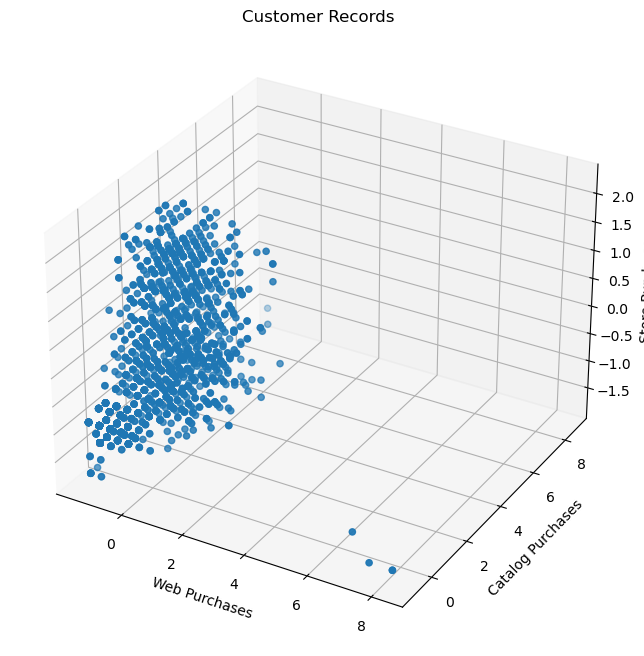

In [ ]:
from matplotlib import pyplot as plt
#3D scatter plot of dataset

x = scaled_df["NumWebPurchases"]
y = scaled_df["NumCatalogPurchases"]
z = scaled_df["NumStorePurchases"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, marker="o" )
ax.set_title("Customer Records")
ax.set_xlabel("Web Purchases")
ax.set_ylabel("Catalog Purchases")
ax.set_zlabel("Store Purchases")
plt.show()

Visually, there doesn't seem to be any straightforward grouping that appeals to the human eye. Let's leave this to our K-means Clustering model. We will fit a K-means model to our data for k values between 2 and 10. We will plot out the inertia of each model and use the Elbow Method to determine the suitable number of clusters.

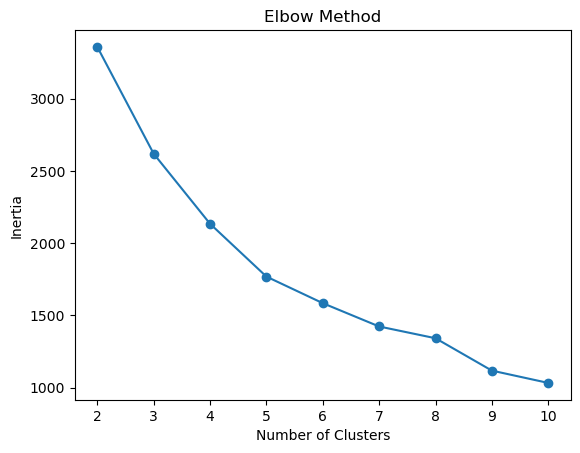

In [ ]:
from sklearn.cluster import KMeans

inertias = []

for i in range(2,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)


plt.plot(range(2,11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

K = 5 seems like a good choice for the number of cluster. We will use this setting to fit our final K-means model, then we will label our data with their corresponding cluster labels and examine the clusters formed in the form of a 3D scatter plot.

In [ ]:
kmeans = KMeans(n_clusters = 5)
cluster_labels = kmeans.fit_predict(scaled_df)

scaled_df['Cluster'] = cluster_labels
scaled_df.head()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Cluster
0,1.409304,2.510890,-0.550785,2
1,-1.110409,-0.568720,-1.166125,1
2,1.409304,-0.226541,1.295237,3
3,-0.750450,-0.910898,-0.550785,1
4,0.329427,0.115638,0.064556,0


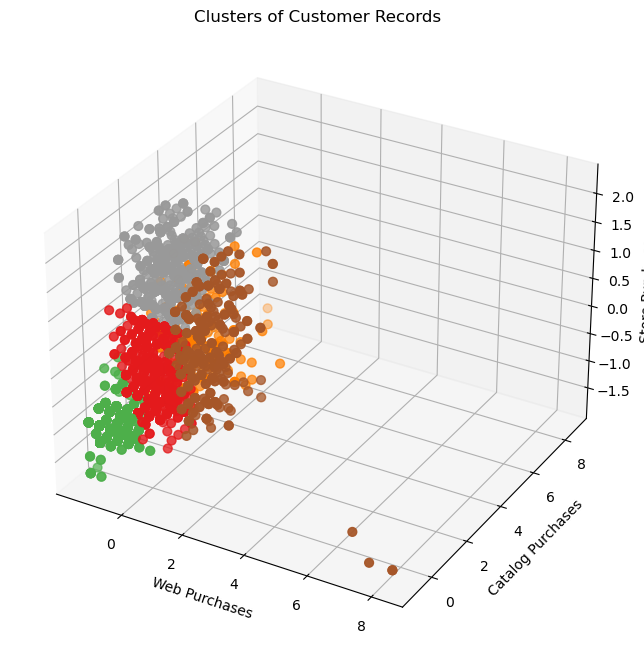

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c = scaled_df["Cluster"], marker='o', cmap = 'Set1' )
ax.set_title("Clusters of Customer Records")
ax.set_xlabel("Web Purchases")
ax.set_ylabel("Catalog Purchases")
ax.set_zlabel("Store Purchases")
plt.show()

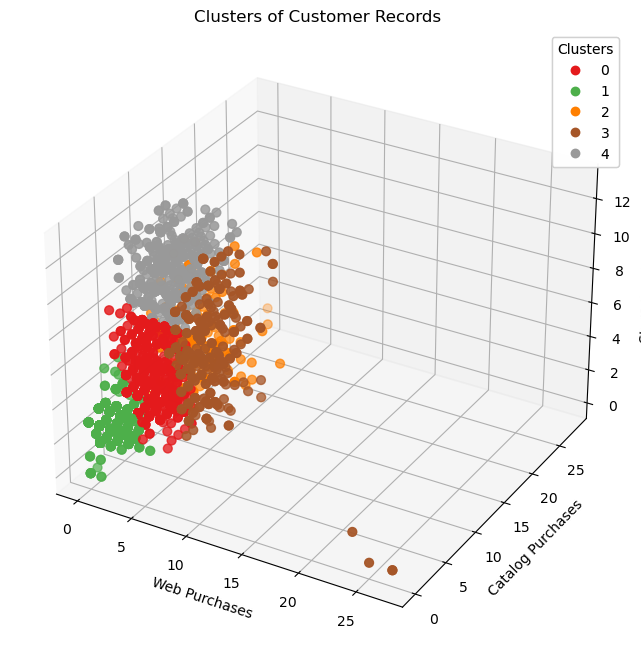

In [ ]:
x_unscaled = df_purchase["NumWebPurchases"]
y_unscaled = df_purchase["NumCatalogPurchases"]
z_unscaled = df_purchase["NumStorePurchases"]

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
sc = ax.scatter(x_unscaled, y_unscaled, z_unscaled, s=40, c = scaled_df["Cluster"], marker='o', cmap = 'Set1' )
ax.set_title("Clusters of Customer Records")
ax.set_xlabel("Web Purchases")
ax.set_ylabel("Catalog Purchases")
ax.set_zlabel("Store Purchases")

#add a legend
legend1 = ax.legend(*sc.legend_elements(),
                    loc="best", title="Clusters")
ax.add_artist(legend1)

plt.show()

## Part 2: Interpreting a K-means Clustering Model

Recall that clustering is a form of unsupervised learning. We do not have a "correct answer" to evaluate our model on. The purpose of this section is to observe and interpret the patterns formed by the clusters. Let's first take a look at the distribution of the clusters.

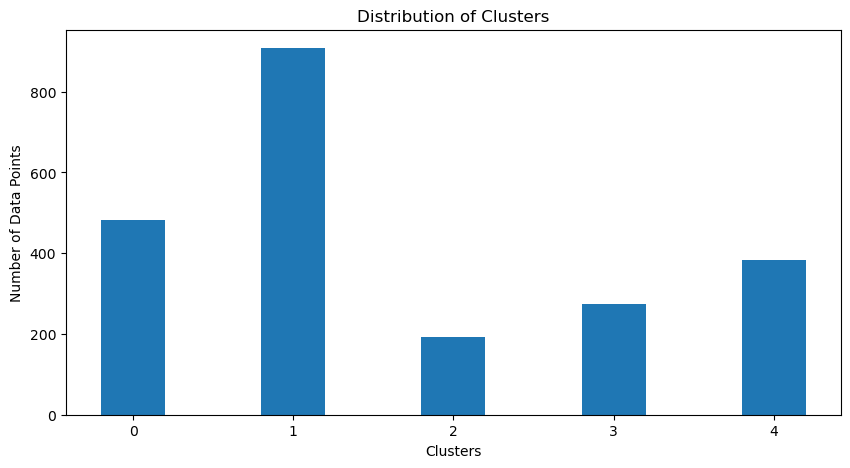

In [ ]:
fig = plt.figure(figsize = (10, 5))

clusters = scaled_df["Cluster"].value_counts()
x = clusters.index.to_list()
y = list(clusters.values)
# creating the bar plot
plt.bar(x, y, width = 0.4)

plt.xlabel("Clusters")
plt.ylabel("Number of Data Points")
plt.title("Distribution of Clusters")
plt.show()

Cluster 0 seems to take up a large portion of the customer base while the other clusters seem to be relatively fairly distributed.

In this demo we've used only three features, allowing for visualization of the cluster points directly. However for higher dimensional points, this is not feasible. Instead, we can plot out the clustered points using pairs of features that we want to investigate to perform profiling on the customer base using those features. Let's have a look at the clustered points using number of store purchases and number of catalog purchases. Note that we will be using the original data rather than scaled data in order to interpret the patterns.

In [ ]:
df_purchase['Cluster'] = scaled_df['Cluster']

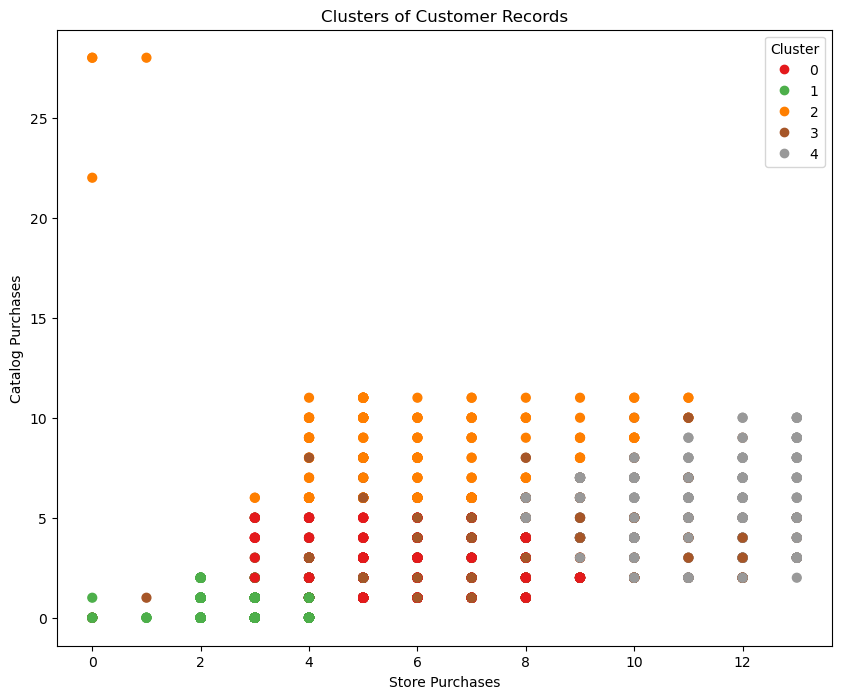

In [ ]:
fig = plt.figure(figsize=(10,8))

scatter = plt.scatter(df_purchase['NumStorePurchases'], df_purchase['NumCatalogPurchases'], s=40, c = df_purchase["Cluster"], marker='o', cmap = 'Set1' )
plt.title("Clusters of Customer Records")
plt.xlabel("Store Purchases")
plt.ylabel("Catalog Purchases")
plt.legend(*scatter.legend_elements(num=4),loc="upper right", title="Cluster")
plt.show()

From this plot we can observe that:

- Cluster 0: Low Catalog Purchases (<=5), Low-to-Mid Store Purchases (3 ~ 9)
- Cluster 1: Low Catalog Purchases (<=2), Low Store Purchases (<=4)
- Cluster 2: Mid Catalog Purchases (<=5), Mid-to-High Store Purchases (4 ~ 9)
- Cluster 3: High Catalog Purchases (<=11), Mid-to-High Store Purchases (4 ~ 10)
- Cluster 4: Mid-to-High Catalog Purchases (3 ~ 9), High Store Purchases (<=13)

From these observations we can identify certain customer groups for ad targeting and develop corresponding business plans. You are encouraged to investigate more feature pairs and observe for more customer profiles.